In [1]:
%pylab inline
import pandas as pd
import scipy
%load_ext autoreload
%autoreload 2
from analysis_toolbox import *

Populating the interactive namespace from numpy and matplotlib


- reran ``python -i qualityBaseline.py`` to get an updated ``computed_myCOCO_BBvals.csv`` table after correcting a COCO mismatch
- ran ``python -i compute_fittings.py f`` and ``python -i compute_fittings.py overall``

In [2]:
overall_fit = pd.read_csv("overall_fit_results.csv", index_col=0)
overall_fit.replace([np.inf, -np.inf], np.nan)
overall_fit=overall_fit.dropna()
# overall_fit.groupby(['metric','Function Name'])['RSS'].apply(mean)

In [3]:
# WRONG 
# overall_fit.groupby("metric").min().reset_index()
# overall_fit[overall_fit["metric"]=="Precision [COCO]"][overall_fit["Function Name"]=="alpha"]

In [4]:
idx = overall_fit.groupby(['metric'])['RSS'].transform(min) ==overall_fit["RSS"]
overall_fit[idx]

,metric,Function Name,Parameters,RSS,D-value,p-value
3,Precision [COCO],beta,"(94.919924084228128, 0.96961007899344487, -7.8...",9.113931,0.48,1.022699e-05
133,Recall [COCO],loggamma,"(0.048134730912252441, 0.99796670550068656, 0....",4.562850,0.46,2.763769e-05
200,Jaccard [COCO],gompertz,"(0.0022885074010021928, 0.45747280857837092, 0...",13.312855,0.46,2.763769e-05
259,NME [COCO],cauchy,"(0.98158830468617631, 0.0086535853767709288)",51.670082,0.84,1.248758e-16
378,Num Points,johnsonsb,"(1.7890646335467597, 0.87268360052911731, 2.57...",0.000239,1.00,2.164688e-23
463,Precision [Self],johnsonsu,"(5.358804273321673, 0.84824230989816773, 1.004...",6.024519,0.34,4.427949e-03
547,Recall [Self],johnsonsu,"(5.6725631100216223, 0.91027614571104043, 1.00...",5.069996,0.42,1.777837e-04
631,Jaccard [Self],johnsonsu,"(1.6767962031564858, 0.97211028378686459, 0.96...",4.567728,0.28,3.166085e-02
714,NME [Self],johnsonsb,"(-6.111371404792628, 1.0551181747996736, -7.16...",30.340145,0.74,5.309437e-13
783,Area Ratio,gengamma,"(4.8615892195166275, 0.3504709888371087, 0.000...",27.142858,0.34,4.427949e-03


In [5]:
overall_fit[overall_fit["metric"]=="Precision [COCO]"][overall_fit["Function Name"]=="beta"]

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,metric,Function Name,Parameters,RSS,D-value,p-value
3,Precision [COCO],beta,"(94.919924084228128, 0.96961007899344487, -7.8...",9.113931,0.48,0.00001


In [ ]:
# ji_fit =test_all_Ji_fit_fcn(fcns_to_test=['norm','johnsonsu','exponpow','t','genpareto'],RAND_SAMPLING=False)

In [22]:
ji_fit = pd.read_csv("Ji_fit_results.csv", index_col=0)
ji_fit.replace([np.inf, -np.inf], np.nan)
ji_fit=ji_fit.dropna()
grouped_ji_fit = ji_fit.groupby(['metric','Function'])['RSS'].apply(mean).reset_index()
idx = grouped_ji_fit.groupby(['metric'])['RSS'].transform(min) ==grouped_ji_fit["RSS"]
grouped_ji_fit[idx]

,metric,Function,RSS
2,Area Ratio,johnsonsu,273751.492666
7,Jaccard [COCO],johnsonsu,675.650556
12,Jaccard [Self],johnsonsu,282.813984
17,NME [COCO],johnsonsu,27439.865281
22,NME [Self],johnsonsu,10812.981946
27,Num Points,johnsonsu,0.065861
32,Precision [COCO],johnsonsu,4570.240080
37,Precision [Self],johnsonsu,1414.982196
42,Recall [COCO],johnsonsu,452.793279
47,Recall [Self],johnsonsu,1145.609356


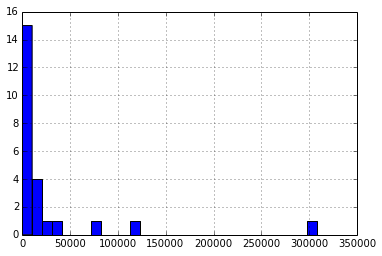

In [14]:
ji_fit[ji_fit["metric"]=="NME [COCO]"][ji_fit["Function"]=="johnsonsu"]['RSS'].hist(bins=30)

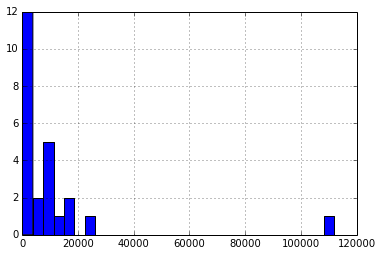

In [15]:
ji_fit[ji_fit["metric"]=="NME [Self]"][ji_fit["Function"]=="johnsonsu"]['RSS'].hist(bins=30)

Since the RSS averages are large, we see that there are quite a few outliers, we should examine these objects and filter them out if necccesary 

In [16]:
ji_fit[ji_fit["metric"]=="NME [Self]"][ji_fit["Function"]=="johnsonsu"][ji_fit["RSS"]>8e4]

,object_id,Function,metric,Mean,SD,RSS,D-value,p-value
41,6,johnsonsu,NME [Self],0.624676,1.315428,111964.771743,1,1.797255e-14


/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  ParserWarning)
/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


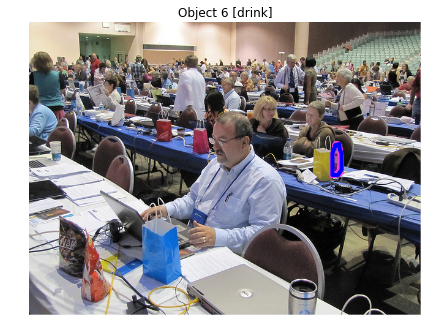

In [17]:
visualize_bb_objects(6)

this is a bit weird that the numbers are so large 

In [18]:
ji_fit[ji_fit["metric"]=="NME [COCO]"][ji_fit["Function"]=="johnsonsu"][ji_fit["RSS"]>5e4]

,object_id,Function,metric,Mean,SD,RSS,D-value,p-value
16,6,johnsonsu,NME [COCO],10.311748,3.488976,308454.448744,1,1.797255e-14
166,11,johnsonsu,NME [COCO],7.987815,1.733827,77456.461825,1,1.797255e-14
1116,44,johnsonsu,NME [COCO],6.273457,1.361528,116935.176049,1,1.797255e-14


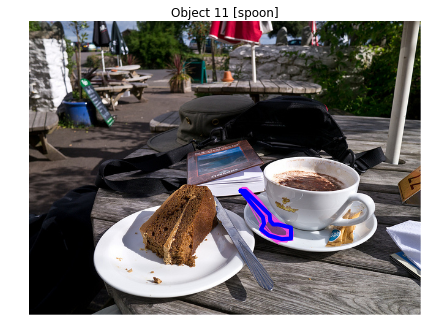

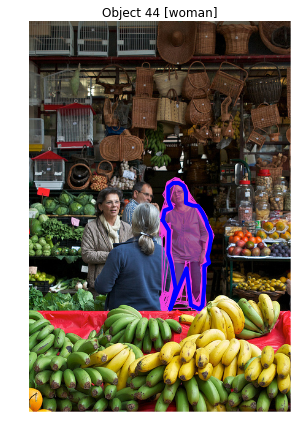

In [19]:
visualize_bb_objects(11)
visualize_bb_objects(44)

Maybe the  Munkres matching is wrong for the objects?  These look like good BBs. I think that johnsonsu may just not be a good fit for these distributions, we are only trying 5 distributions, so johnsonsu is the best fit, but only out of the 5 fits, one thing we could do is to increase the number of functions that we are fitting against. while eliminating the distributions that are very bad for most things 

In [23]:
idx = grouped_ji_fit.groupby(['metric'])['RSS'].transform(max) ==grouped_ji_fit["RSS"]
grouped_ji_fit[idx]

,metric,Function,RSS
1,Area Ratio,genpareto,989396.612418
6,Jaccard [COCO],genpareto,1822.317783
11,Jaccard [Self],genpareto,1004.888703
16,NME [COCO],genpareto,92847.385604
21,NME [Self],genpareto,62558.351198
25,Num Points,exponpow,0.083868
30,Precision [COCO],exponpow,17104.842967
36,Precision [Self],genpareto,3793.328717
41,Recall [COCO],genpareto,2018.025429
46,Recall [Self],genpareto,3095.600826


In [ ]:
fit_results =test_all_Ji_fit_fcn(fcns_to_test=['norm','johnsonsu','t','johnsonsb','cauchy','beta','loggamma','gompertz','gengamma'],RAND_SAMPLING=False)

  0%|          | 0/24 [00:00<?, ?it/s]/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/scipy/optimize/minpack.py:237: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
 25%|██▌       | 6/24 [00:43<02:10,  0.14it/s]

In [183]:
# sorted_df_stats_tbl = df_stats_tbl[df_stats_tbl["p-value"]>0.05].sort(["RSS","p-value"],ascending=[True,False])
# idx = sorted_df_stats_tbl.groupby(['metric'])['RSS'].transform(min) ==sorted_df_stats_tbl["RSS"]
# sorted_df_stats_tbl[idx]

##### Best fitting functions for each metric 

In [185]:
idx = df_stats_tbl.groupby(['metric'])['RSS'].transform(min) ==df_stats_tbl["RSS"]
df_stats_tbl[idx]

,metric,Function Name,Parameters,RSS,D-value,p-value
3,Precision [COCO],beta,"(94.9199240842, 0.969610078993, -7.84315798742...",9.113931,0.48,1.022699e-05
133,Recall [COCO],loggamma,"(0.0481347309123, 0.997966705501, 0.0046087175...",4.562850,0.46,2.763769e-05
200,Jaccard [COCO],gompertz,"(0.002288507401, 0.457472808578, 0.0711950705997)",13.312855,0.46,2.763769e-05
259,NME [COCO],cauchy,"(0.981588304686, 0.00865358537677)",51.670082,0.84,1.248758e-16
378,Num Points,johnsonsb,"(1.78906463355, 0.872683600529, 2.57126560216,...",0.000239,1.00,2.164688e-23
463,Precision [Self],johnsonsu,"(5.60677852705, 0.844861280829, 1.00448298037,...",6.826660,0.34,4.427949e-03
547,Recall [Self],johnsonsu,"(5.46750757986, 0.912177549296, 1.00526518455,...",5.494230,0.42,1.777837e-04
631,Jaccard [Self],johnsonsu,"(1.61491888233, 0.946641875046, 0.964153608486...",4.573405,0.28,3.166085e-02
679,NME [Self],cauchy,"(0.98156409667, 0.00925033988235)",35.632197,0.80,4.008887e-15
783,Area Ratio,gengamma,"(4.86158921952, 0.350470988837, 0.000438567258...",27.142858,0.34,4.427949e-03


#### Table 2 Best fitting functions

In [238]:
print tabulate(df_stats_tbl[idx].drop("Parameters",axis=1),showindex="False",headers='keys',tablefmt='latex',floatfmt='.3g')

\begin{tabular}{llrrr}
\hline
 metric           & Function Name   &       RSS &   D-value &   p-value \\
\hline
 Precision [COCO] & beta            &  9.11     &      0.48 &  1.02e-05 \\
 Recall [COCO]    & loggamma        &  4.56     &      0.46 &  2.76e-05 \\
 Jaccard [COCO]   & gompertz        & 13.3      &      0.46 &  2.76e-05 \\
 NME [COCO]       & cauchy          & 51.7      &      0.84 &  1.25e-16 \\
 Num Points       & johnsonsb       &  0.000239 &      1    &  2.16e-23 \\
 Precision [Self] & johnsonsu       &  6.83     &      0.34 &  0.00443  \\
 Recall [Self]    & johnsonsu       &  5.49     &      0.42 &  0.000178 \\
 Jaccard [Self]   & johnsonsu       &  4.57     &      0.28 &  0.0317   \\
 NME [Self]       & cauchy          & 35.6      &      0.8  &  4.01e-15 \\
 Area Ratio       & gengamma        & 27.1      &      0.34 &  0.00443  \\
\hline
\end{tabular}


#### Table 3: Johnson SU fitting results 

In [194]:
johnsonsu_tbl = df_stats_tbl[df_stats_tbl['Function Name']=='johnsonsu'].drop(['Parameters','Function Name'],axis=1)

In [221]:
bigpowtbl = df_stats_tbl[df_stats_tbl['Function Name']=='johnsonsu'].drop("Function Name",axis=1)
powtbl  = bigpowtbl['Parameters'].apply(pd.Series)
powtbl.columns =["xi","lambda","Shift","Scale"]
bigpowtbl = bigpowtbl.drop("Parameters",axis=1)

In [222]:
bigpowtbl.join(powtbl)

,metric,RSS,D-value,p-value,xi,lambda,Shift,Scale
43,Precision [COCO],10.040541,0.36,2.111951e-03,5.177937,0.750699,1.001447,0.000113
127,Recall [COCO],7.009698,0.44,7.159507e-05,5.913342,1.089807,1.006643,0.000617
211,Jaccard [COCO],13.537526,0.30,1.714441e-02,5.640332,1.115838,0.994723,0.001731
295,NME [COCO],217.919699,0.70,1.116526e-11,1.305715,0.612127,0.989977,0.003180
379,Num Points,0.000437,1.00,2.164688e-23,-6.229590,1.212153,0.795895,0.212017
463,Precision [Self],6.826660,0.34,4.427949e-03,5.606779,0.844861,1.004483,0.000184
547,Recall [Self],5.494230,0.42,1.777837e-04,5.467508,0.912178,1.005265,0.000290
631,Jaccard [Self],4.573405,0.28,3.166085e-02,1.614919,0.946642,0.964154,0.039441
715,NME [Self],107.279070,0.64,7.839819e-10,1.156889,0.614027,0.990525,0.003668
799,Area Ratio,30.389562,0.32,8.899159e-03,-4.900214,0.783876,-0.000196,0.000117


In [230]:
print tabulate(bigpowtbl.join(powtbl),showindex="False",headers='keys',tablefmt='latex',floatfmt='.2g')

\begin{tabular}{lrrrrrrr}
\hline
 metric           &      RSS &   D-value &   p-value &   xi &   lambda &   Shift &   Scale \\
\hline
 Precision [COCO] & 10       &      0.36 &   0.0021  &  5.2 &     0.75 &  1      & 0.00011 \\
 Recall [COCO]    &  7       &      0.44 &   7.2e-05 &  5.9 &     1.1  &  1      & 0.00062 \\
 Jaccard [COCO]   & 14       &      0.3  &   0.017   &  5.6 &     1.1  &  0.99   & 0.0017  \\
 NME [COCO]       &  2.2e+02 &      0.7  &   1.1e-11 &  1.3 &     0.61 &  0.99   & 0.0032  \\
 Num Points       &  0.00044 &      1    &   2.2e-23 & -6.2 &     1.2  &  0.8    & 0.21    \\
 Precision [Self] &  6.8     &      0.34 &   0.0044  &  5.6 &     0.84 &  1      & 0.00018 \\
 Recall [Self]    &  5.5     &      0.42 &   0.00018 &  5.5 &     0.91 &  1      & 0.00029 \\
 Jaccard [Self]   &  4.6     &      0.28 &   0.032   &  1.6 &     0.95 &  0.96   & 0.039   \\
 NME [Self]       &  1.1e+02 &      0.64 &   7.8e-10 &  1.2 &     0.61 &  0.99   & 0.0037  \\
 Area Ratio       & 

# $J_i$ worker distributions

testing only interpretable,likely functions

In [111]:
fit_results =test_all_Ji_fit_fcn(fcns_to_test=['norm','johnsonsu','exponpow','t','genpareto'],RAND_SAMPLING=False)

In [114]:
idx = fit_results.groupby(['metric'])['RSS'].transform(min) ==fit_results["RSS"]
fit_results[idx].drop("object_id",axis=1)

,Function,metric,Mean,SD,RSS,D-value,p-value
203,t,Precision [COCO],1.516051,0.961724,14.940744,0.700000,2.619896e-07
212,exponpow,Jaccard [COCO],8.238207,0.396909,10.234424,0.633333,4.643599e-06
227,exponpow,Precision [Self],2.697500,0.715316,9.118679,0.733333,5.586982e-08
431,johnsonsu,Recall [Self],0.951170,0.601479,11.937833,0.500000,6.157790e-04
441,johnsonsu,NME [Self],0.636654,0.946433,141.942812,0.500000,6.157790e-04
723,t,Num Points,41.318935,56.865187,0.000920,1.000000,1.797255e-14
746,johnsonsu,Area Ratio,0.887783,0.459264,111.366893,0.433333,4.607065e-03
908,t,Recall [COCO],1.008015,0.985744,6.213872,0.800000,2.047957e-09
937,exponpow,Jaccard [Self],3.846984,0.885654,10.304681,0.900000,8.383579e-12
966,johnsonsu,NME [COCO],0.774936,0.368741,117.115048,0.733333,5.586982e-08


In [115]:
print tabulate(fit_results[idx].drop("object_id",axis=1),showindex="False",headers='keys',tablefmt='latex',floatfmt='.3g')

\begin{tabular}{llrrrrr}
\hline
 Function   & metric           &   Mean &     SD &       RSS &   D-value &   p-value \\
\hline
 t          & Precision [COCO] &  1.52  &  0.962 &  14.9     &     0.7   &  2.62e-07 \\
 exponpow   & Jaccard [COCO]   &  8.24  &  0.397 &  10.2     &     0.633 &  4.64e-06 \\
 exponpow   & Precision [Self] &  2.7   &  0.715 &   9.12    &     0.733 &  5.59e-08 \\
 johnsonsu  & Recall [Self]    &  0.951 &  0.601 &  11.9     &     0.5   &  0.000616 \\
 johnsonsu  & NME [Self]       &  0.637 &  0.946 & 142       &     0.5   &  0.000616 \\
 t          & Num Points       & 41.3   & 56.9   &   0.00092 &     1     &  1.8e-14  \\
 johnsonsu  & Area Ratio       &  0.888 &  0.459 & 111       &     0.433 &  0.00461  \\
 t          & Recall [COCO]    &  1.01  &  0.986 &   6.21    &     0.8   &  2.05e-09 \\
 exponpow   & Jaccard [Self]   &  3.85  &  0.886 &  10.3     &     0.9   &  8.38e-12 \\
 johnsonsu  & NME [COCO]       &  0.775 &  0.369 & 117       &     0.733 &  5.59e

In [120]:
#The fitting is not really statistically significant, average RSS is quite large too 
print gaussian_fit_results.RSS.mean()
print len(gaussian_fit_results[gaussian_fit_results["p-value"]>0.5])

43855.978878
0


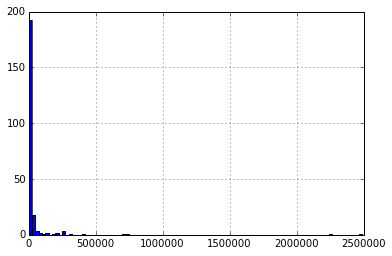

In [123]:
gaussian_fit_results.RSS.hist(bins=100)

{'boxes': [<matplotlib.lines.Line2D at 0x11873b350>],
 'caps': [<matplotlib.lines.Line2D at 0x11f258f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x11089ac50>,
 'medians': [<matplotlib.lines.Line2D at 0x11873b6d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11f258fd0>,
  <matplotlib.lines.Line2D at 0x11f258a90>]}

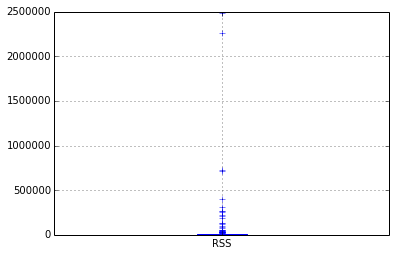

In [127]:
gaussian_fit_results.boxplot(column="RSS")

In [198]:
def RSSBoxplot(fit_results,fcn_name):
    data_lst = []
    for metric in metrics_lst:
        data = np.array(fit_results[fit_results["Metric"]==metric].RSS)
        data_lst.append(data)
    fig,ax = plt.subplots()
    ax.set_yscale('log')
    plt.boxplot(data_lst)
    plt.ylim(0,1e6)
    plt.ylabel("{} fit RSS".format(fcn_name),fontsize=12)
    p = ax.set_xticklabels([metrics_lst[i] for i in range(len(metrics_lst))], rotation=25,ha='right',fontsize=12)
    plt.tight_layout()
    plt.savefig("{}RSSBoxplot.pdf".format(fcn_name))

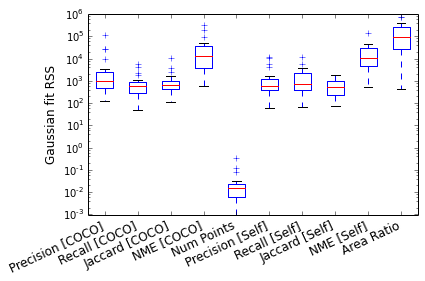

In [199]:
RSSBoxplot(gaussian_fit_results,"Gaussian")

### Testing Assumption 3: Influence of task difficulty on spread

In [267]:
fcn = scipy.stats.norm
params = fcn.fit(metric_value)
histo,bin_edges = np.histogram(metric_value, NBINS, normed=1)
bins = ((bin_edges+np.roll(bin_edges,-1))/2)[:-1]
y = fcn.pdf(bins, *params)
RSS =sum((histo-y)**2)
(mean(metric_value),std(metric_value))==params

True

In [310]:
import ast
def std_fits_num_points(NBINS=30):
    '''
    Compute std for Gaussian and Johnson SU fits
    '''
    bb_info = pd.read_csv('computed_my_COCO_BBvals.csv')
    obj_sorted_tbl =  bb_info[bb_info['Jaccard [COCO]']!=-1][bb_info['Jaccard [COCO]']!=0][bb_info['Jaccard [Self]']!=0].sort('object_id')
    object_id_lst  = list(set(obj_sorted_tbl.object_id))
    metrics_lst = ['Precision [COCO]','Recall [COCO]','Jaccard [COCO]',"NME [COCO]","Num Points",\
               'Precision [Self]','Recall [Self]','Jaccard [Self]',"NME [Self]","Area Ratio"]
    data_fit_stats=[]
    for objid in tqdm(object_id_lst):
        # Ji_tbl (bb_info) is the set of all workers that annotated object i 
        bb  = obj_sorted_tbl[obj_sorted_tbl["object_id"]==objid]
        numPoints = bb["x_locs"].apply(lambda x: len(ast.literal_eval(x))).mean()
        for i,metric in zip(range(len(metrics_lst)),metrics_lst):
            if metric in ["Num Points"]:
                metric_value = np.array(bb[metric])
            else:
                #restrict range [0,1] for normalized measures
                metric_value = np.array(bb[metric][bb[metric]>0][bb[metric]<=1]) 
            
            fcn = scipy.stats.johnsonsu 
            a,b,scale,loc = fcn.fit(metric_value)
            histo,bin_edges = np.histogram(metric_value, NBINS, normed=1)
            bins = ((bin_edges+np.roll(bin_edges,-1))/2)[:-1]
            y = fcn.pdf(bins, a,b,scale,loc)
            RSS =sum((histo-y)**2)
            ks_result = kolmogorov_smirnov(bins,y,fcn.name) #D-value and p-value
            # object_id, Metric, mu, sd,RSS,D-value,p-value
            data_stats  = [objid,metric,numPoints,fcn.mean(a,b),fcn.std(a,b),RSS,ks_result[0],ks_result[1]] 

            
            fcn = scipy.stats.norm
            params = fcn.fit(metric_value)
            histo,bin_edges = np.histogram(metric_value, NBINS, normed=1)
            bins = ((bin_edges+np.roll(bin_edges,-1))/2)[:-1]
            y = fcn.pdf(bins, *params)
            RSS =sum((histo-y)**2)
            data_stats.extend([params[0],params[1],RSS,ks_result[0],ks_result[1]])
            
            data_fit_stats.append(data_stats)
        
            

    fit_results =pd.DataFrame(data_fit_stats,columns=["object_id", "Metric","Average Num Points","Mean [JSU]", "SD [JSU]","RSS [JSU]","D-value [JSU]","p-value [JSU]",
                                                     "Mean [Norm]", "SD [Norm]","RSS [Norm]","D-value [Norm]","p-value [Norm]"])
    return fit_results

In [311]:
std_fits_data = std_fits_num_points()

##### Perform a linear regression of SD spread of distribution versus the average number of points in the plot (i.e. how hard it is to draw the BB)

These plots don't make sense since they mix up all the metrics, we need to examine each metric separately to see it more clearly. the good linear fit for the large range comes from metric = numpoint so it is almost x=y since the plot is numPts v.s. numPts'

In [449]:
# plt.plot(std_fits_data["SD [Norm]"],std_fits_data["Average Num Points"],'o')
# nan_filtered_std_fits_data = std_fits_data[~std_fits_data["SD [JSU]"].isnull()][std_fits_data["SD [JSU]"]<100000]
# xdata = nan_filtered_std_fits_data["SD [JSU]"]
# ydata = nan_filtered_std_fits_data["Average Num Points"]
# oid = nan_filtered_std_fits_data["object_id"]
# plt.plot(xdata,ydata,'o')
# for x,y,oid in zip(xdata,ydata,oid):
#     plt.text(x+0.01,y+0.01,oid)

Outliers: 
- 3 chocolate : there is quite a few imprecise BB drawn. 
- 12 knife, very narrow object, hard to annotate
- 15 car, also a small object, hard to annotate
- 9 book, several disagreements
- 40 driver (small,hard to annotate) 
- 41 yellow bannana (task ambiguity)
- 18 monitor, although this is quite a rectangular looking object, there is also quite a few disagreement in the border regions

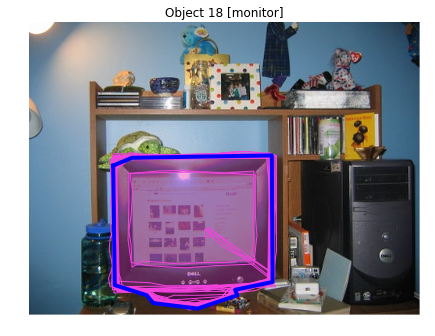

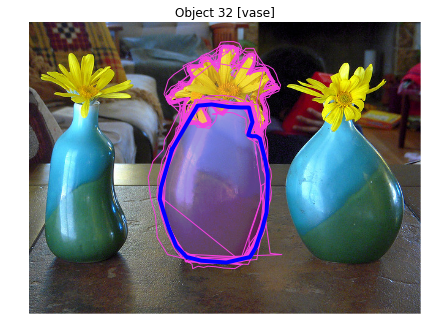

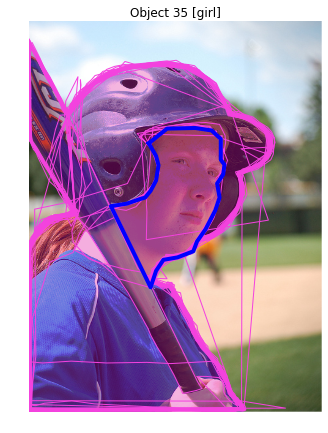

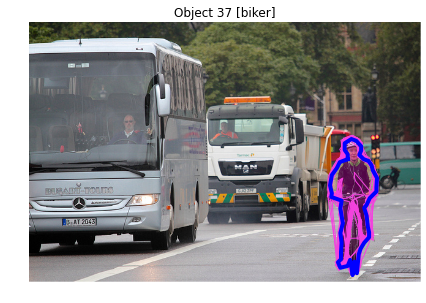

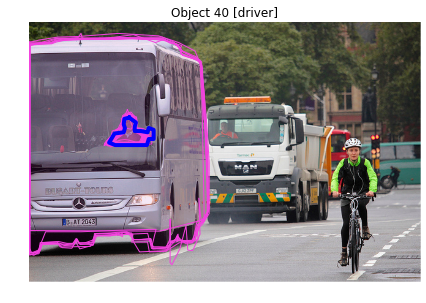

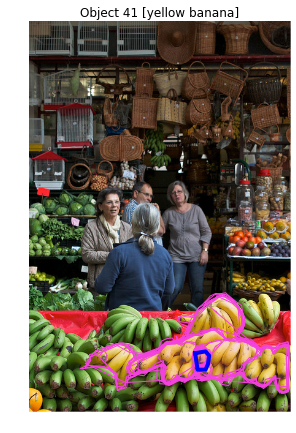

In [497]:
# visualize_bb_objects(9)
visualize_bb_objects(18)
visualize_bb_objects(32)
visualize_bb_objects(35)
visualize_bb_objects(37)
# visualize_bb_objects(39)
visualize_bb_objects(40)
visualize_bb_objects(41)

R: 0.208893612516
p-value:  0.437501240752
there is no relationship between the variables
R: -0.32439794729
p-value:  0.220264582503
there is no relationship between the variables
R: -0.127104463125
p-value:  0.639007768882
there is no relationship between the variables
R: 0.180112624025
p-value:  0.504451853789
there is no relationship between the variables
R: 0.151655287625
p-value:  0.575020336672
there is no relationship between the variables
R: 0.853723903492
p-value:  2.58647617523e-05
NOT there is no relationship between the variables
R: 0.590190102548
p-value:  0.016095950818
NOT there is no relationship between the variables
R: -0.131977792303
p-value:  0.626096212303
there is no relationship between the variables
R: -0.226173079929
p-value:  0.399619345837
there is no relationship between the variables
R: 0.0269405030872
p-value:  0.921108376744
there is no relationship between the variables


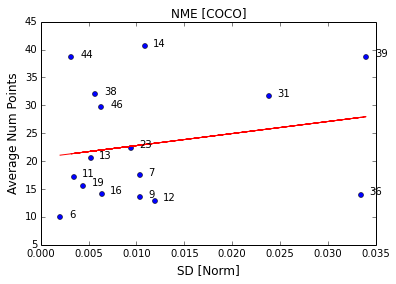

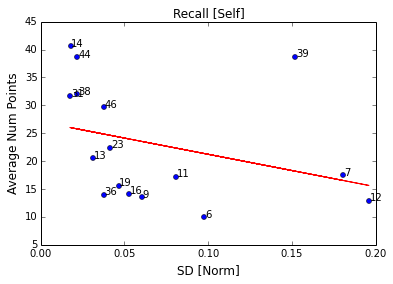

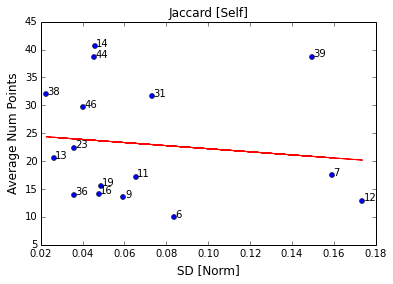

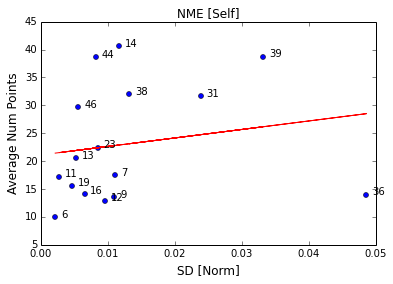

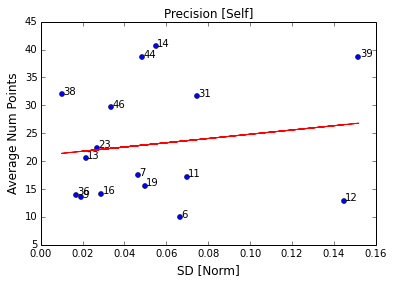

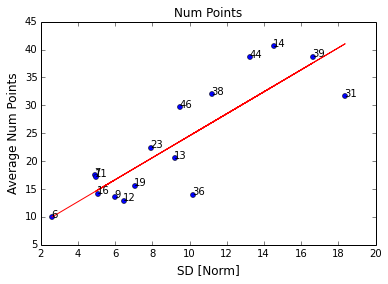

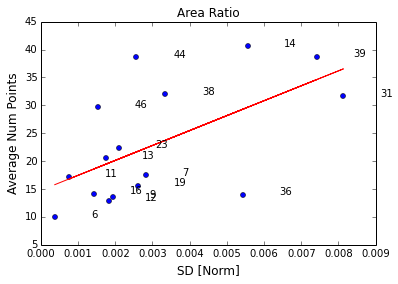

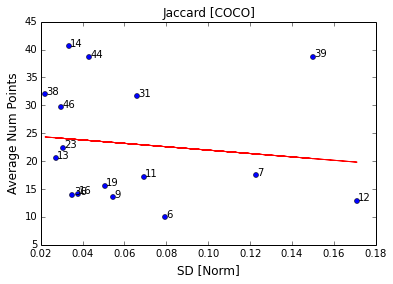

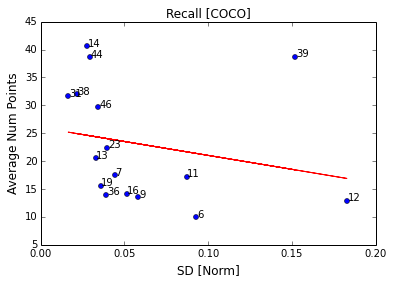

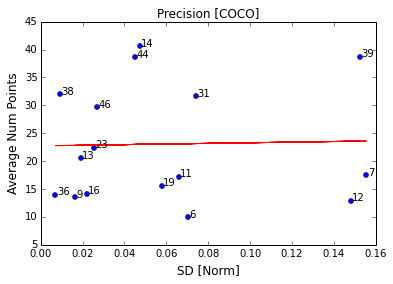

In [500]:
metrics = list(set(std_fits_data["Metric"]))
task_ambiguous_outlier =[18,32,33,35,37,40,41]
data_tbl = []
for metric in metrics:
    plt.figure()
    plt.title(metric)
    metric_only_fit_result = std_fits_data[std_fits_data["Metric"]==metric][~std_fits_data["object_id"].isin(task_ambiguous_outlier)]
    xdata = metric_only_fit_result["SD [Norm]"]
    ydata= metric_only_fit_result["Average Num Points"]
    oid = metric_only_fit_result["object_id"]
    for x,y,oid in zip(xdata,ydata,oid):
        plt.text(x+0.001,y+0.001,oid)
    plt.plot(xdata,ydata,'o',color="blue",ms=5)    
    plt.xlabel(xname,fontsize=12)
    plt.ylabel(yname,fontsize=12)
    params = np.polyfit(xdata,ydata,1)
    fcn = np.poly1d(params)
    y_interpolate = fcn(xdata)
    plt.plot(xdata,y_interpolate,'red')
    results =stats.pearsonr(xdata,ydata)
    R = results[0]
    pval = results[1]
    print "R:",R
    print "p-value: ",pval
    print pcheck(results[1],"there is no relationship between the variables")
    # metric, R, p-value , t-value, p-value 
    data_tbl.append([metric,R,pval,result[0],result[1]])

In [491]:
print tabulate(pd.DataFrame(data_tbl,columns=["Metric", "R", "p [MW]" , "U", "p [MW]"]),floatfmt='.3e',showindex="False",headers='keys',tablefmt='latex')

\begin{tabular}{lrrrr}
\hline
 Metric           &          R &    p [MW] &         U &    p [MW] \\
\hline
 NME [COCO]       &  3.159e-01 & 2.168e-01 & 0.000e+00 & 3.527e-07 \\
 Recall [Self]    & -3.629e-01 & 1.522e-01 & 0.000e+00 & 3.527e-07 \\
 Jaccard [Self]   & -1.147e-01 & 6.610e-01 & 0.000e+00 & 3.527e-07 \\
 NME [Self]       &  2.727e-01 & 2.897e-01 & 0.000e+00 & 3.527e-07 \\
 Precision [Self] &  1.783e-01 & 4.935e-01 & 0.000e+00 & 3.527e-07 \\
 Num Points       &  8.392e-01 & 2.533e-05 & 3.100e+01 & 4.969e-05 \\
 Area Ratio       &  6.042e-01 & 1.021e-02 & 0.000e+00 & 3.527e-07 \\
 Jaccard [COCO]   & -1.105e-01 & 6.729e-01 & 0.000e+00 & 3.527e-07 \\
 Recall [COCO]    & -2.680e-01 & 2.983e-01 & 0.000e+00 & 3.527e-07 \\
 Precision [COCO] &  4.823e-02 & 8.541e-01 & 0.000e+00 & 3.527e-07 \\
\hline
\end{tabular}


All the hypothesis test (Mann whitney, t-test) assume samples come from the same population, they consider the same variable conditioned on different things, rather than testing for independnece betwee n two diferent variables. Chi2 sort of works for this but it has the normality assumption built in.

In [ ]:
nan_filtered_std_fits_data = std_fits_data[~std_fits_data["SD [JSU]"].isnull()]

In [563]:
task_ambiguous_outlier =[18,22,32,35,37,40,41]
data_tbl = []

#     data =[sd_name]
for metric in metrics_lst:
    data =[]
    for sd_name in ["SD [Norm]","SD [JSU]"]:
        metric_only_fit_result = nan_filtered_std_fits_data[nan_filtered_std_fits_data["Metric"]==metric][~nan_filtered_std_fits_data["object_id"].isin(task_ambiguous_outlier)]


        xdata = metric_only_fit_result[sd_name]
        ydata= metric_only_fit_result["Average Num Points"]
        oid = metric_only_fit_result["object_id"]
        
#         plt.figure()
#         plt.title(metric)
#         for x,y,oid in zip(xdata,ydata,oid):
#             plt.text(x+0.001,y+0.001,oid)
#         plt.plot(xdata,ydata,'o',color="blue",ms=5)    
#         plt.xlabel(xname,fontsize=12)
#         plt.ylabel(yname,fontsize=12)
#         params = np.polyfit(xdata,ydata,1)
#         fcn = np.poly1d(params)
#         y_interpolate = fcn(xdata)
#         plt.plot(xdata,y_interpolate,'red')
        
        results =stats.pearsonr(xdata,ydata)
        R = results[0]
        pval = results[1]
#         print "R:",R
#         print "p-value: ",pval
#         print pcheck(results[1],"there is no linear correlation between the variables")
        data.extend([R,pval])
    data_tbl.append(data)

In [592]:
result_tbl = pd.DataFrame(data_tbl).T
result_tbl.columns = ['P [C]', 'R [C]', 'J [C]','NME [C]','NumPt','P [C]','R [S]', 'J [S]','NME [S]','Area']
result_tbl.index=['R [Norm]','p[Norm]','R [JSU]','p [JSU]']

In [593]:
result_tbl

,P [C],R [C],J [C],NME [C],NumPt,P [C],R [S],J [S],NME [S],Area
R [Norm],0.048233,-0.268011,-0.110509,0.315886,0.839244,0.178326,-0.362945,-0.045290,0.272680,0.604159
p[Norm],0.854148,0.298317,0.672856,0.216772,0.000025,0.493488,0.152187,0.867725,0.289651,0.010212
R [JSU],0.310844,0.016643,0.032022,-0.123913,-0.262019,0.474351,-0.186027,0.613525,0.509926,0.274909
p [JSU],0.224599,0.949448,0.902895,0.635626,0.309660,0.054380,0.474693,0.011482,0.036516,0.285570


In [594]:
print tabulate(result_tbl,headers='keys',tablefmt='latex',floatfmt=".2f")

\begin{tabular}{lrrrrrrrrrr}
\hline
          &   P [C] &   R [C] &   J [C] &   NME [C] &   NumPt &   P [C] &   R [S] &   J [S] &   NME [S] &   Area \\
\hline
 R [Norm] &    0.05 &   -0.27 &   -0.11 &      0.32 &    0.84 &    0.18 &   -0.36 &   -0.05 &      0.27 &   0.60 \\
 p[Norm]  &    0.85 &    0.30 &    0.67 &      0.22 &    0.00 &    0.49 &    0.15 &    0.87 &      0.29 &   0.01 \\
 R [JSU]  &    0.31 &    0.02 &    0.03 &     -0.12 &   -0.26 &    0.47 &   -0.19 &    0.61 &      0.51 &   0.27 \\
 p [JSU]  &    0.22 &    0.95 &    0.90 &      0.64 &    0.31 &    0.05 &    0.47 &    0.01 &      0.04 &   0.29 \\
\hline
\end{tabular}


We can conduct separate analysis based on 3  different errors

In [580]:
task_ambiguity = [1,4,8,10,18,20,22,27,28,29,30,31,32,33,35,40,42]
small_area = [1,15,22]
high_numPts=[5,7,9,10,11,12,28,29,30,37]